In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (24, 10)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 18

In [2]:
with open("analysis/society-ipd-epsilon-0.2.pickle", "rb") as f:
    data = pickle.load(f)

In [3]:
weight_df = pd.DataFrame(
    [
        ["train", population, lb, w]
        for (population, lb, t), weights in data["train_weights"].items()
        for weight in weights
        for w in np.array(weight).ravel()
        if np.isfinite(w)
    ]
    + [
        ["test", population, lb, w]
        for (population, lb, t), weights in data["test_weights"].items()
        for weight in weights
        for w in np.array(weight).ravel()
        if np.isfinite(w)
    ],
    columns=["phase", "population", "lookback", "weight"],
)

weight_df

,phase,population,lookback,weight
0,train,16,1,0.692760
1,train,16,1,0.701456
2,train,16,1,0.633911
3,train,16,1,0.715236
4,train,16,1,0.734375
...,...,...,...,...
69686395,test,512,5,0.428571
69686396,test,512,5,0.564103
69686397,test,512,5,0.736264
69686398,test,512,5,0.696970


(0.0, 1.0)

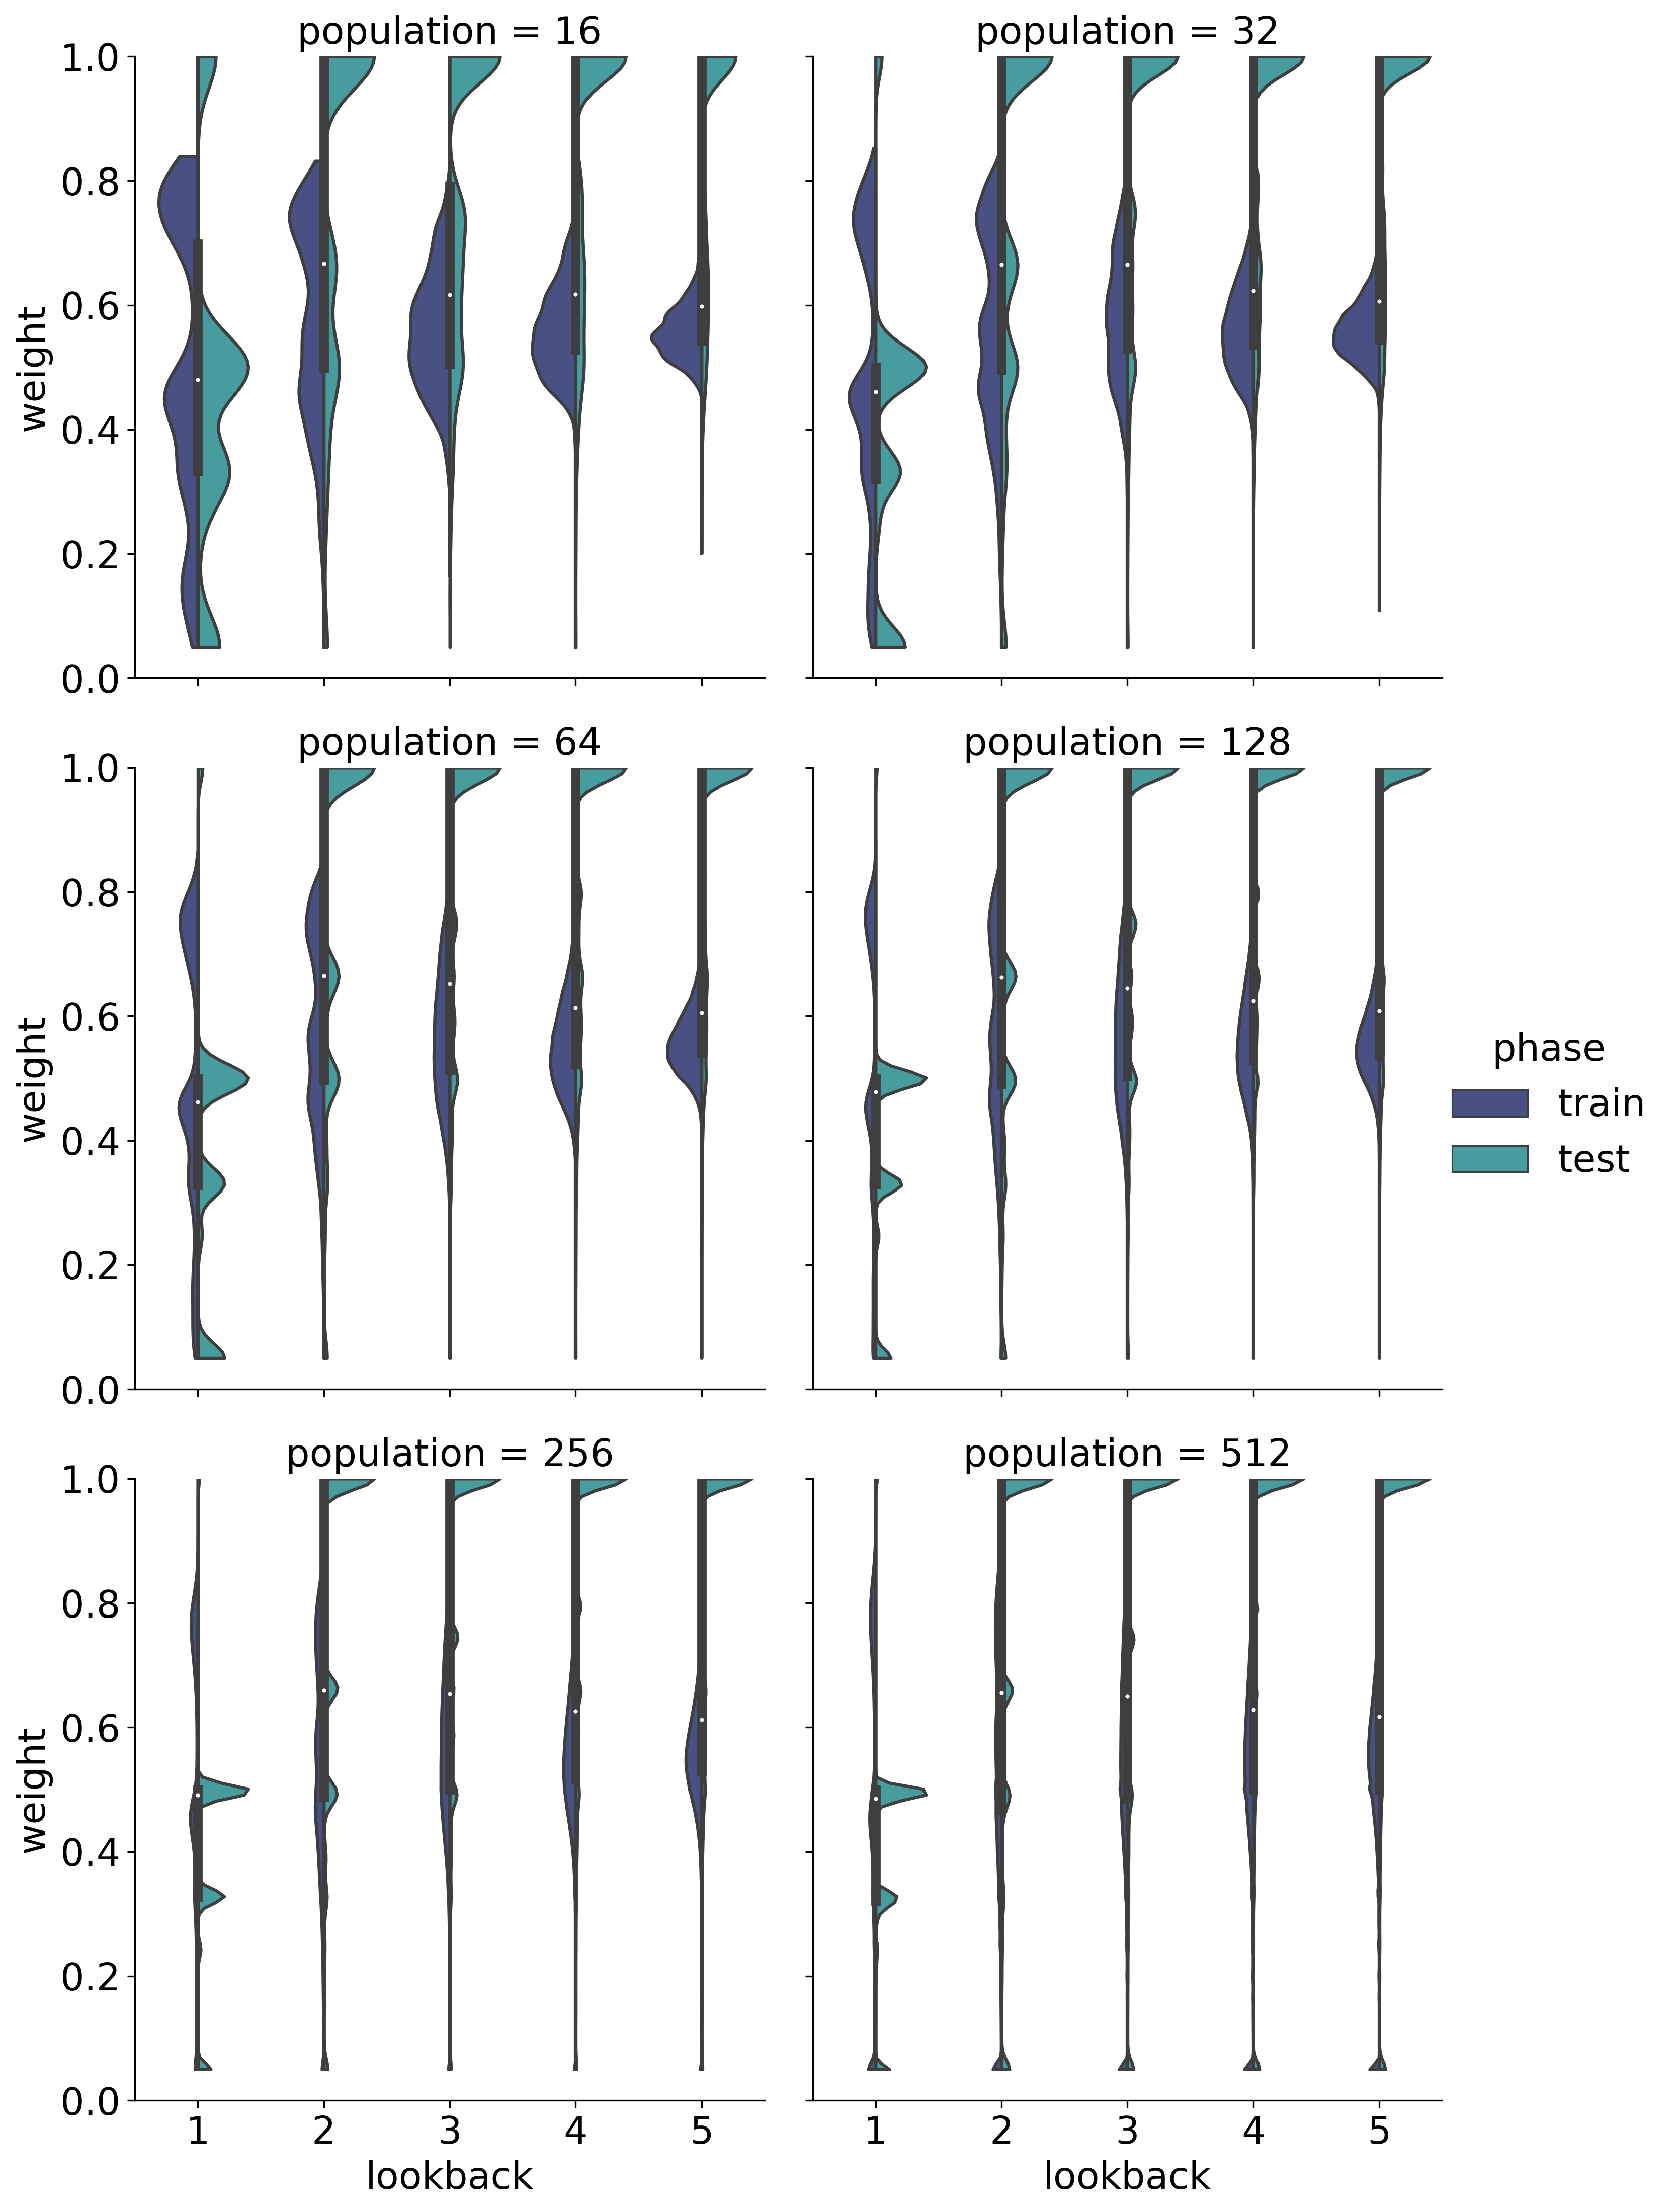

In [4]:
sns.catplot(
    data=weight_df,
    x="lookback",
    y="weight",
    hue="phase",
    col="population",
    palette="mako",
    col_wrap=2,
    kind="violin",
    cut=0,
    split=True,
)

plt.ylim(0.0, 1.0)

In [5]:
reward_df = pd.DataFrame(
    [
        ["train", population, lb, reward]
        for (population, lb, t), rewards in data["train_mean_reward"].items()
        for reward in rewards
    ]
    + [
        ["test", population, lb, reward]
        for (population, lb, t), rewards in data["test_mean_reward"].items()
        for reward in rewards
    ],
    columns=["phase", "population", "lookback", "mean_reward"],
)

reward_df

,phase,population,lookback,mean_reward
0,train,16,1,2.589228
1,train,16,1,2.615781
2,train,16,1,2.578191
3,train,16,1,2.691503
4,train,16,1,2.774319
...,...,...,...,...
1195,test,512,5,2.917120
1196,test,512,5,2.925600
1197,test,512,5,2.923906
1198,test,512,5,2.914068


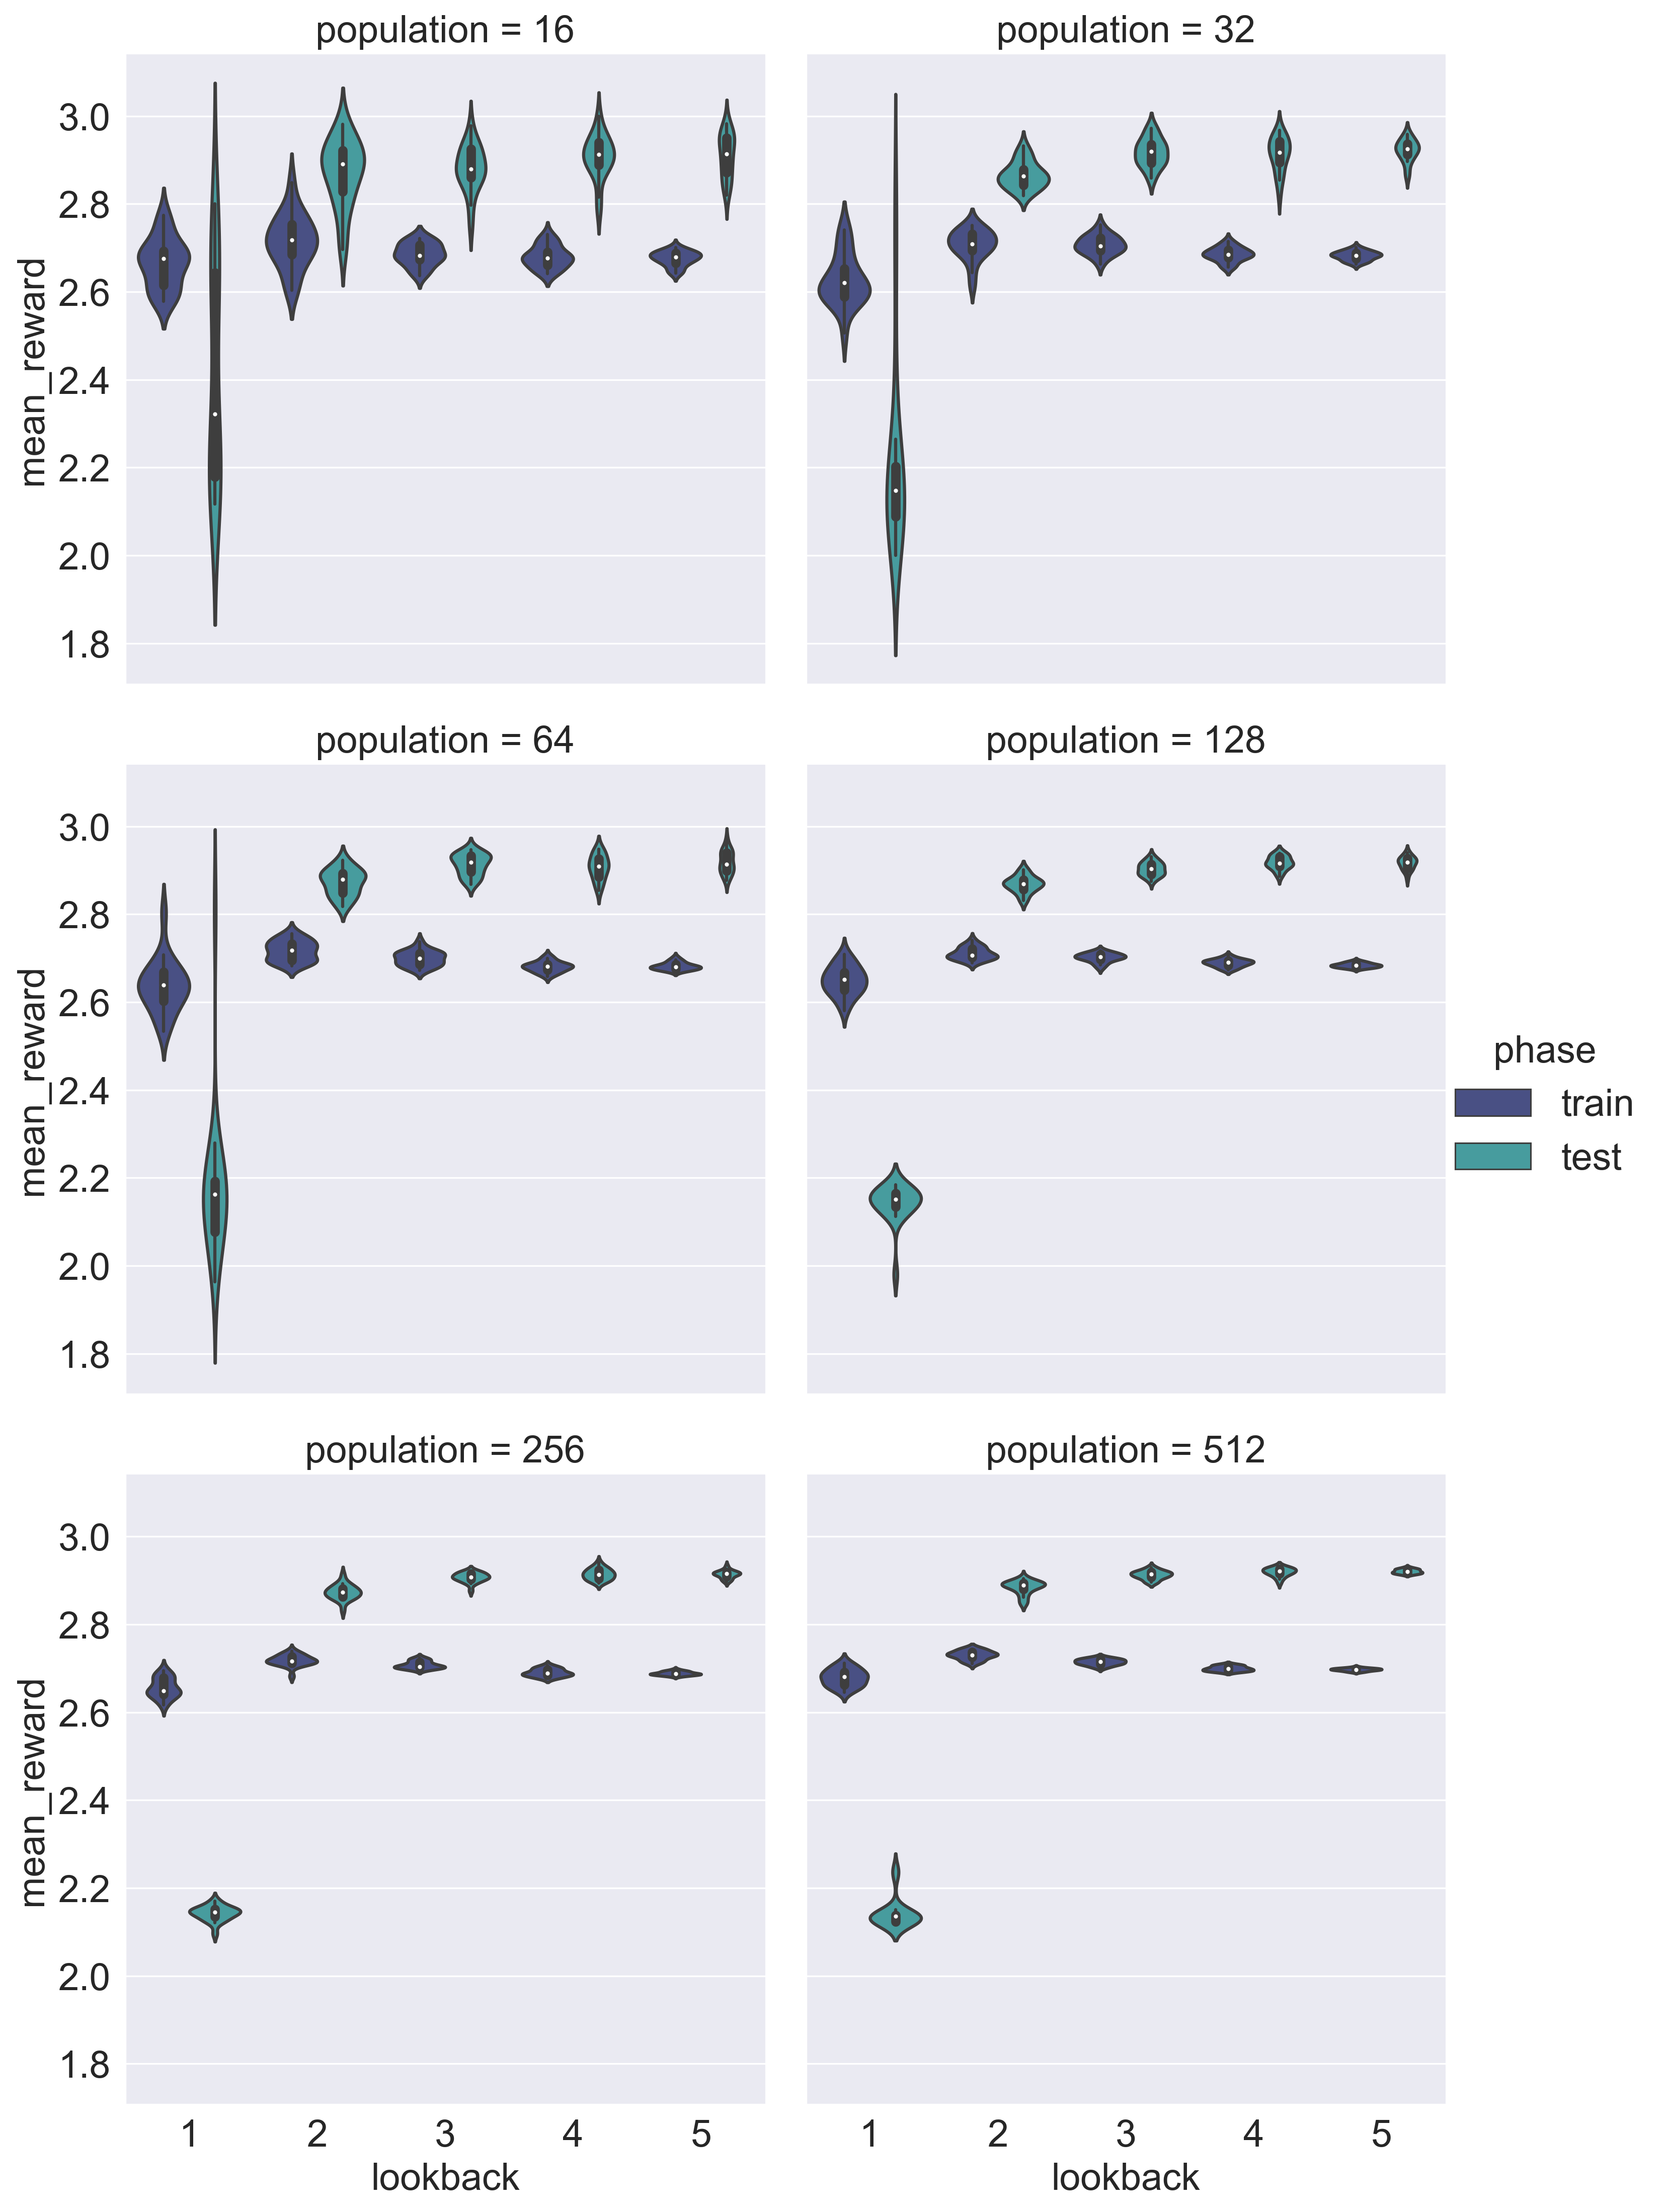

In [6]:
sns.set_style("darkgrid")

sns.catplot(
    reward_df,
    x="lookback",
    y="mean_reward",
    col="population",
    col_wrap=2,
    hue="phase",
    palette="mako",
    kind="violin",
)